### EGOYQN

# TO DO LIST YOUPIE

- Fix errors 

- Have more features, many are removed ....

- We need to implement GridSearchCV for the trees and then pass best parameters to function written in HELPERS 

- many other things but above is good enough 

In [380]:
%matplotlib inline
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [355]:
import sys
sys.path.append('STUDIES')
from proj2_HELPERS import *

We have two files, one with daily observation and one with the patients info. 

In [356]:
df_clinic = pd.read_csv('../../Original dataset/EGOYQN_Gueckedou_clinFU_cleaned_pos_and_neg_2019_November.csv')
#df.columns.values # To look at all columns

/home/lavinia/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [357]:
df_linelist = pd.read_csv('../../Original dataset/EGOYQN_Gueckedou_linelist_cleaned_pos_and_neg_2019_November_ANSI.csv', encoding = 'ISO-8859-1')
df_linelist.head()

,msfid,mcid,datmac,transit,admis,gkdid,datgck,age,sex,respref,...,pcr2ct,epistat,commun,currstat,exdat,outold,outcome,locdec,condat,source
0,G1,Absent,01/01/1900,Non,Non,Absent,01/01/1900,60.0,2,14,...,.,2,1,1,2/22/2014,3,2,GUECKEDOU,02/02/2014,.
1,G10,Absent,01/01/1900,Non,Non,Absent,01/01/1900,35.0,2,14,...,.,1,0,1,3/17/2014,1,2,Hosto GKD,2/25/2014,.
2,G100,Absent,01/01/1900,Non,Oui,GKD25,04/11/2014,40.0,1,14,...,.,1,0,2,4/20/2014,8,1,na,01/01/1900,.
3,G1000,MC260,9/17/2014,Non,Oui,GKD775,01/01/1900,40.0,1,25,...,.,1,0,1,9/19/2014,3,2,Non rempli,01/01/1900,.
4,G1001,Absent,9/17/2014,Non,Oui,GKD776,9/19/2014,8.0,2,25,...,.,1,0,1,9/21/2014,3,2,Non rempli,01/01/1900,.


In [358]:
df_linelist['epistat'].value_counts()


1    1372
0     978
2     135
3      13
9       2
Name: epistat, dtype: int64

### msfid

In [359]:
df_clinic['msfid'].value_counts()

G313     77
G2472    72
U4       69
G2477    63
G412     58
         ..
G110      1
G2500     1
G1472     1
G248      1
G1744     1
Name: msfid, Length: 784, dtype: int64

### datclin

In [360]:
df_clinic['datclin']

0         4/14/2014
1         4/14/2014
2         4/16/2014
3         4/15/2014
4         4/15/2014
            ...    
13761    11/20/2014
13762    11/20/2014
13763    11/21/2014
13764    11/16/2014
13765    11/16/2014
Name: datclin, Length: 13766, dtype: object

df_clinic['datclin_day'] = df_clinic['datclin'].dt.to_period('D')
df_clinic['datclin_month'] = df_clinic['datclin'].dt.to_period('M')

In [192]:
df_clinic.columns.values

array(['msfid', 'datclin', 'timclin', 'unid', 'ceph', 'asthen', 'myalc',
       'arthralc', 'fevr', 'oedc', 'chocc', 'anurc', 'convc', 'swallow',
       'hiccups', 'anorc', 'nausc', 'vomit', 'abdopain', 'abdosens',
       'doulqs', 'diarrc', 'gastro', 'cough', 'dyspc', 'resp',
       'chestpain', 'vertpain', 'lombar', 'ictc', 'pruri', 'hepmeg',
       'splenmeg', 'erupcut', 'deshyd', 'photoc', 'occulair', 'tremb',
       'friss', 'vert', 'amenn', 'pros', 'desor', 'agitc', 'othrsym',
       'injconj', 'epista', 'gum', 'hemopty', 'hematem', 'stool', 'hemat',
       'vagbl', 'injbl', 'petc', 'othrhe', 'fevtemp', 'pouls', 'bp',
       'rrate', 'deshcat', 'conscc', 'parat', 'coartt', 'artest', 'ppnt',
       'orst', 'paracett', 'ciprot', 'cefixt', 'ceftriaxt', 'multivitt',
       'metaclot', 'omept', 'diazt', 'tramadt', 'ctrz', 'cta', 'metro',
       'amox', 'prometh', 'amoclav', 'genta', 'ampi', 'albend', 'azithro',
       'chlor', 'morph', 'tetra', 'fluco', 'mysta', 'busco', 'miso',
     

KeyError: 'datclin_day'

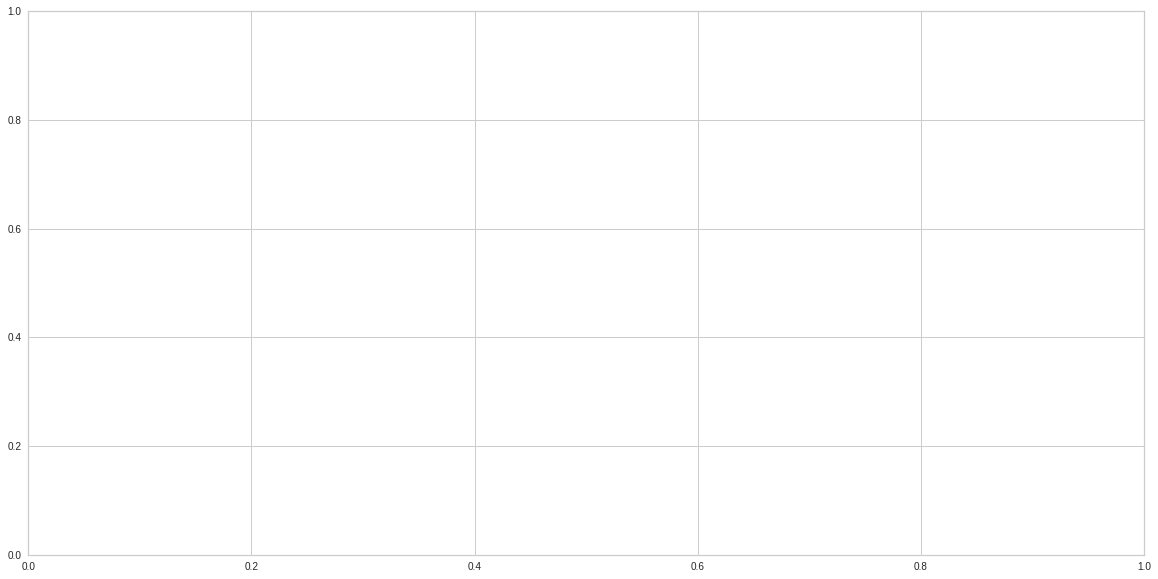

In [193]:
fig, ax = plt.subplots(figsize=(20,10))

df_clinic['datclin_day'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the daily observations",size=15)
ax.set_xlabel('Day')
ax.set_ylabel('Number of observations')
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.xticks(rotation=70)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

df_clinic.groupby('datclin_day').msfid.nunique().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the number of patients",size=15)
ax.set_xlabel('Day')
ax.set_ylabel('Number of patients')
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.xticks(rotation=70)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

df_clinic['datclin_month'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the monthly observations",size=15)
ax.set_xlabel('Month')
ax.set_ylabel('Number of observations')
plt.xticks(rotation=70)
plt.show()

#### timclin

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

df_clinic['timclin'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the observations of patients per hour",size=15)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of patients')
plt.xticks(rotation=70)
plt.show()

The unknwon hours are represented by 99.

### Symptoms

In [194]:
#othrsym and othrhe categorical but a lot of categories
symptoms = ['ceph', 'asthen', 'myalc', 'arthralc', 'fevr', 'oedc', 'chocc', 'anurc', 'convc', 'swallow', 'hiccups', \
            'anorc', 'nausc', 'vomit','abdopain', 'abdosens', 'doulqs', 'diarrc', 'gastro', 'cough', 'dyspc', 'resp', \
            'chestpain', 'vertpain', 'lombar', 'ictc', 'pruri', 'hepmeg', 'splenmeg', 'erupcut', 'deshyd', 'photoc', \
            'occulair', 'tremb', 'friss', 'vert', 'amenn', 'pros', 'desor', 'agitc', 'injconj', 'epista', \
            'gum', 'hemopty', 'hematem', 'stool', 'hemat', 'vagbl', 'injbl', 'petc']

In [195]:
df_symp = df_clinic[symptoms]


df_symp

,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,swallow,...,injconj,epista,gum,hemopty,hematem,stool,hemat,vagbl,injbl,petc
0,0,0,0,0,.,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,.,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,.,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,.,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,.,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13761,0,0,0,0,8,8,8,0,8,0,...,0,0,0,0,0,0,0,0,0,0
13762,0,0,0,0,8,8,8,0,8,0,...,0,0,0,0,0,0,0,0,0,0
13763,0,0,0,0,8,8,8,0,8,0,...,0,0,0,0,0,0,0,0,0,0
13764,1,1,1,1,1,0,8,0,8,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
df_symp.isna().apply(lambda x: sum(x)).sort_values(ascending = False)

petc         0
nausc        0
chestpain    0
resp         0
dyspc        0
cough        0
gastro       0
diarrc       0
doulqs       0
abdosens     0
abdopain     0
vomit        0
anorc        0
injbl        0
hiccups      0
swallow      0
convc        0
anurc        0
chocc        0
oedc         0
fevr         0
arthralc     0
myalc        0
asthen       0
vertpain     0
lombar       0
ictc         0
pruri        0
vagbl        0
hemat        0
stool        0
hematem      0
hemopty      0
gum          0
epista       0
injconj      0
agitc        0
desor        0
pros         0
amenn        0
vert         0
friss        0
tremb        0
occulair     0
photoc       0
deshyd       0
erupcut      0
splenmeg     0
hepmeg       0
ceph         0
dtype: int64

In [197]:
print(df_clinic['msfid'].nunique())
df_linelist['msfid'].nunique()

784


2500

In [198]:
dict_symp_answer = {'Non' : 'No', 'Oui' : 'Yes', 'Non rempli' : 'Unknown', 
                    'Pas applicable (non inclus dans fiche)' : 'Unknown', 
                    'Unknown' : 'Unknown', 'Nan' : 'Unknown', 'nan' : 'Unknown',
                    'na': 'Unknown', '.': 'Unknown', '0': 'No', '1': 'Yes', 
                    '8': 'Unknown', '9': 'Unknown'}
df_symp = df_symp.astype('str')
df_symp.fillna('Unknown', inplace = True)

df_symp = df_symp.applymap(lambda x: dict_symp_answer[x])

We plot the symptoms distribution for all the possible observations. 

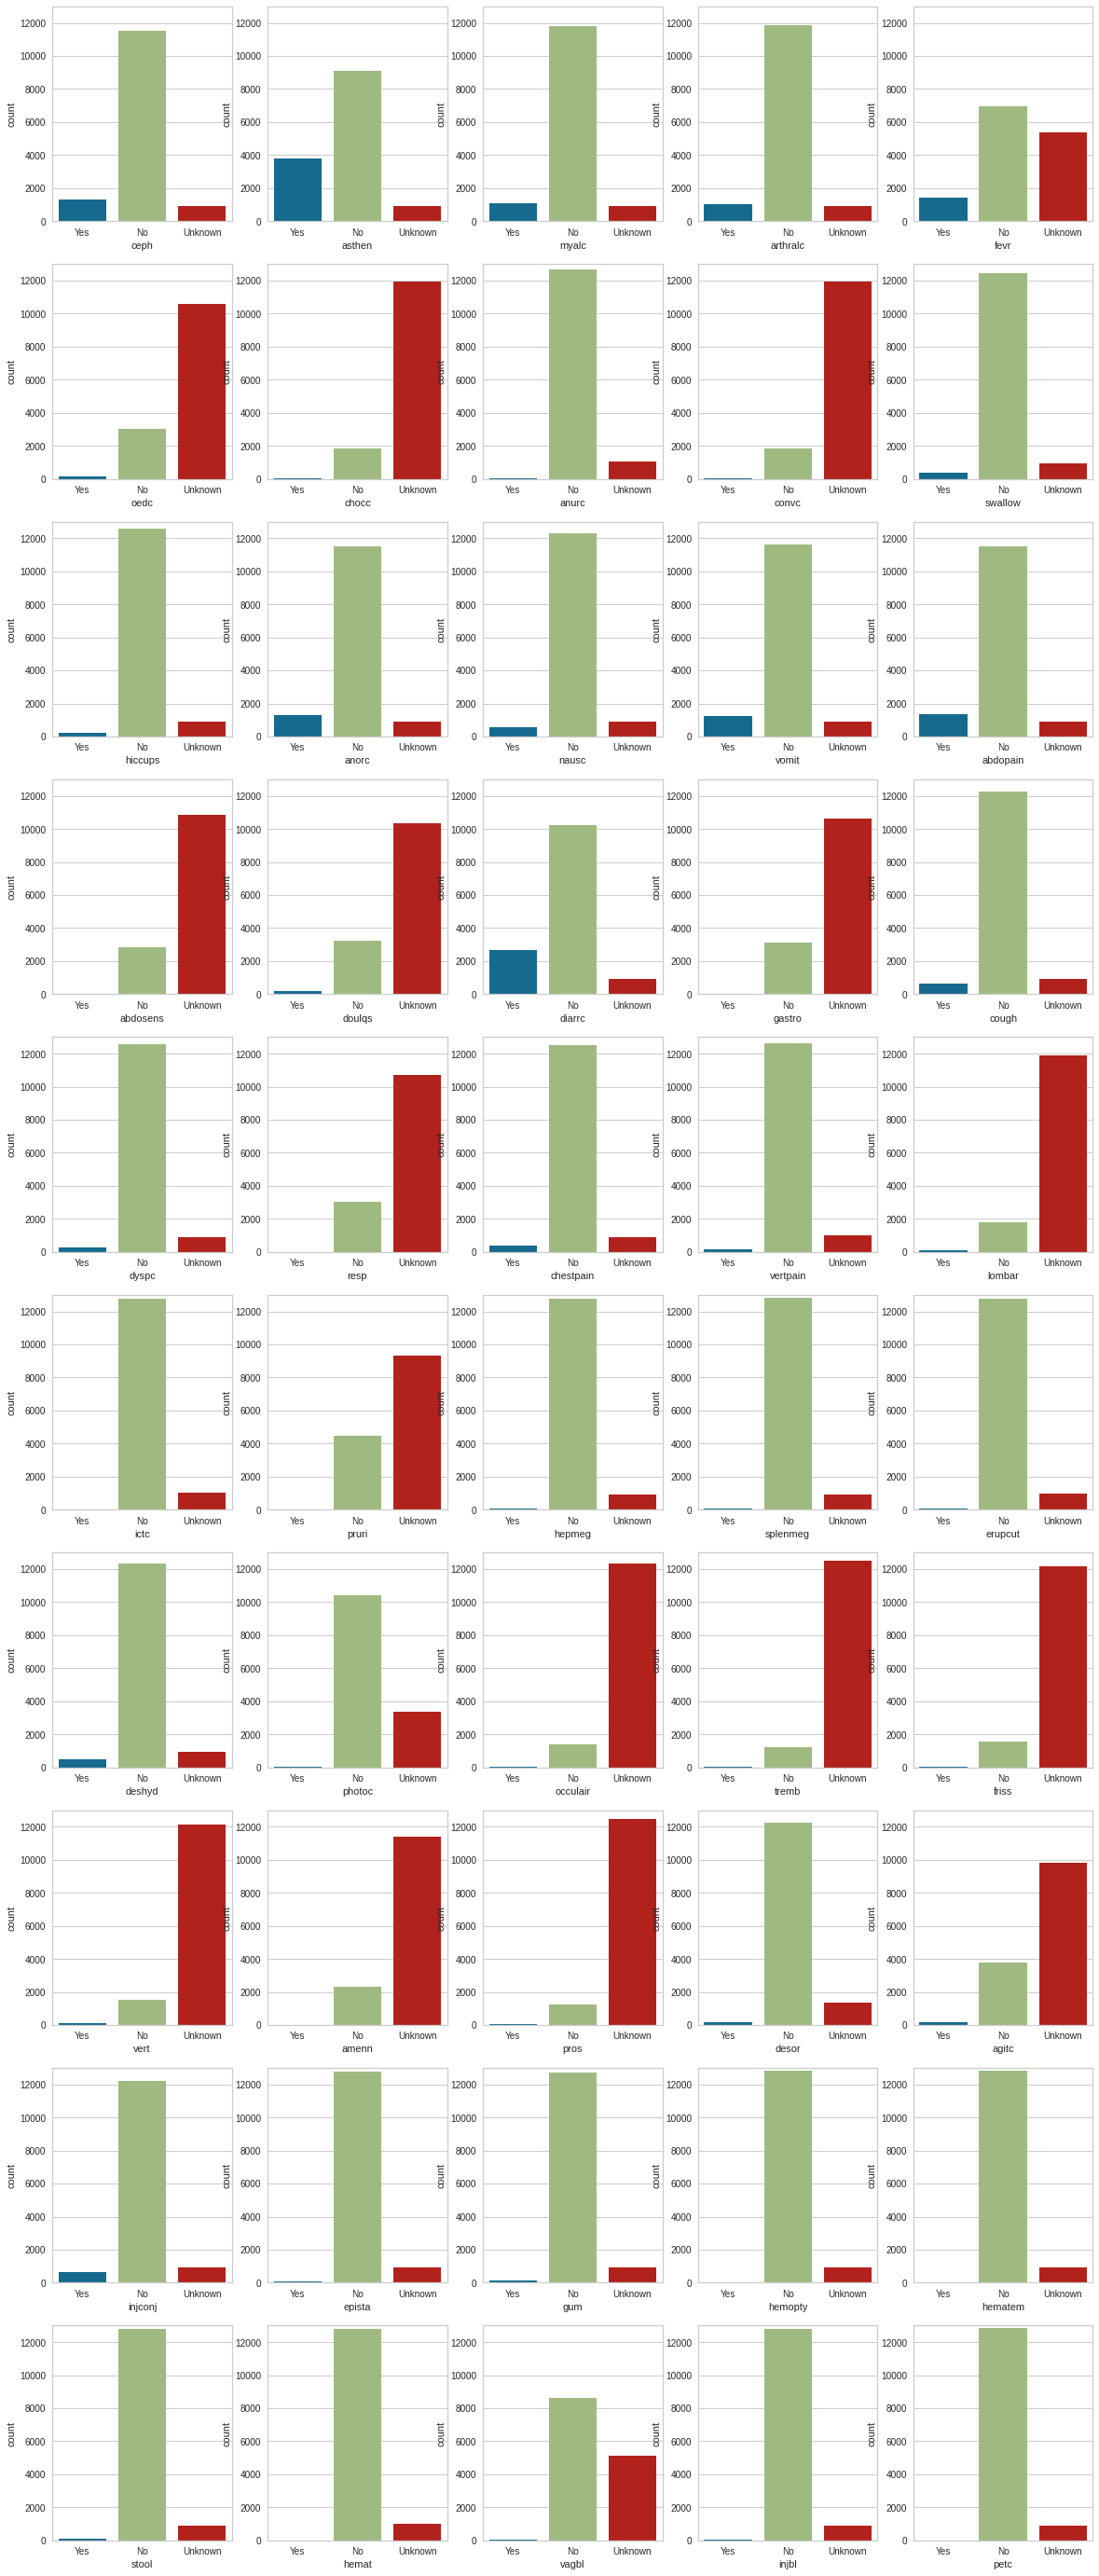

In [199]:
fig, axes = plt.subplots(nrows = 10, ncols=5, figsize=(20,50))
for ax, col in zip(axes.flatten(), df_symp.columns):
    sns.countplot(df_symp[col], ax = ax, order = ['Yes', 'No', 'Unknown'])
    #plt.title('Distribution of the symptom {}'.format(col))
    ax.set_ylim(0, 13000)

In [200]:
yes_series = df_symp.applymap(lambda x : 1 if x== 'Yes' else 0 ).apply(lambda x :sum(x))
no_series = df_symp.applymap(lambda x : 1 if x== 'No' else 0 ).apply(lambda x :sum(x))
unknown_series = df_symp.applymap(lambda x : 1 if x== 'Unknown' else 0 ).apply(lambda x :sum(x))

In [201]:
count_symptoms = pd.concat([yes_series, no_series, unknown_series], axis=1)
count_symptoms.columns = ['Yes', 'No', 'Unknown']
total_observations = 13598
count_symptoms / total_observations

,Yes,No,Unknown
ceph,0.096338,0.849095,0.066922
asthen,0.276879,0.668848,0.066627
myalc,0.078909,0.866451,0.066995
arthralc,0.074937,0.870349,0.067069
fevr,0.104280,0.513090,0.394985
oedc,0.011031,0.223856,0.777467
chocc,0.002647,0.133034,0.876673
anurc,0.003456,0.933740,0.075158
convc,0.000882,0.134505,0.876967
swallow,0.028754,0.916605,0.066995


**Possibility 1 :** Use categorical features for symptoms then need 1 hot encoding.

**Possibility 2 :** Use numerical features for symptoms as the number of observed symptoms.

In [202]:
df_clinic['msfid'].value_counts()

G313     77
G2472    72
U4       69
G2477    63
G412     58
         ..
G110      1
G2500     1
G1472     1
G248      1
G1744     1
Name: msfid, Length: 784, dtype: int64

Now we want the cumulated observations per patient. 

In [203]:
# People might have gone mutliple times at the clinic, how often do they come with these symptoms
df_yes_symp = df_symp.applymap(lambda x : 1 if x== 'Yes' else 0 )
df_yes_symp['msfid'] = df_clinic['msfid']
df_yes_symp

,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,swallow,...,epista,gum,hemopty,hematem,stool,hemat,vagbl,injbl,petc,msfid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G1841
13762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G1841
13763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G1841
13764,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G1934


In [204]:
df_yes_symp_patient = df_yes_symp.groupby('msfid').sum()
df_yes_symp_patient

,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,swallow,...,injconj,epista,gum,hemopty,hematem,stool,hemat,vagbl,injbl,petc
msfid,,,,,,,,,,,,,,,,,,,,,
G100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G1000,0,2,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
G1001,1,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G1002,2,5,0,0,5,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
G1004,0,2,1,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U4,6,7,2,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U5,1,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U6,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Possibility 3 :** Use binary features for symptoms as the presence of symtoms (1 for 'Yes' and 0 for 'No' or 'Unknown')

We can try to predict with these features, number of observations for which the symptom has been observed. 

In [205]:
df_presence_symp_patient = df_yes_symp_patient.applymap(lambda x: 1 if x>= 1 else 0 )
df_presence_symp_patient

,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,swallow,...,injconj,epista,gum,hemopty,hematem,stool,hemat,vagbl,injbl,petc
msfid,,,,,,,,,,,,,,,,,,,,,
G100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G1000,0,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
G1001,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G1002,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
G1004,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
df_symp['msfid'] = df_clinic['msfid']

In [207]:
df_symp.columns

Index(['ceph', 'asthen', 'myalc', 'arthralc', 'fevr', 'oedc', 'chocc', 'anurc',
       'convc', 'swallow', 'hiccups', 'anorc', 'nausc', 'vomit', 'abdopain',
       'abdosens', 'doulqs', 'diarrc', 'gastro', 'cough', 'dyspc', 'resp',
       'chestpain', 'vertpain', 'lombar', 'ictc', 'pruri', 'hepmeg',
       'splenmeg', 'erupcut', 'deshyd', 'photoc', 'occulair', 'tremb', 'friss',
       'vert', 'amenn', 'pros', 'desor', 'agitc', 'injconj', 'epista', 'gum',
       'hemopty', 'hematem', 'stool', 'hemat', 'vagbl', 'injbl', 'petc',
       'msfid'],
      dtype='object')

In [208]:
df_symp.groupby('msfid')

In [209]:
df_symp['fevr'].value_counts()

No         6977
Unknown    5371
Yes        1418
Name: fevr, dtype: int64

# Model on Linelist, prediction of ebola, yes or no 

Should we add travel

In [361]:
symptoms_pred = ['symfev', 'symn', 'symv', 'symvom', 'symdiar', 'symfat',
       'symanor', 'symdouab', 'symdouth', 'symdoumu', 'symdouar',
       'symceph', 'symtoux', 'symresp', 'symaval', 'symmalg', 'symict',
       'symconj', 'symercut', 'symhoq', 'symorb', 'symcoma', 'symconf',
       'symasth', 'symhemor', 'hemgen', 'heminj', 'hemnez', 'hemsel',
       'hemvoms', 'hemvomn', 'hemtou', 'hemvag', 'hempet', 'hemuri',
       'hemaut', 'contsusp', 'funvis', 'hospvis', 'anicon', 'anitiq','epistat']



#patient_pred = ['age', 'sex']



In [362]:
df_symp_pred = df_linelist[symptoms_pred]
df_sex = df_linelist['sex']
df_sex = df_sex.astype('str')
df_symp_pred = df_symp_pred.astype('str')

In [363]:
dict_symp_answer = {'Non' : 'No', 'Oui' : 'Yes', 'Non rempli' : 'Unknown', 
                    'Pas applicable (non inclus dans fiche)' : 'Unknown', 
                    'Unknown' : '-1', 'Nan' : '-1', 'nan' : '-1', '7' : '-1',
                    'na': '-1', '.': '-1', 
                    '8': '-1', '9': '-1', '1':'1', '0':'0', '2':'-1', '3':'-1'}


df_symp_pred = df_symp_pred.applymap(lambda x : dict_symp_answer[x])


In [364]:
# 1 for women, 2 for men
dict_sex = {'1': '1', '2':'0', '9': '-1'}
df_sex = df_sex.apply(lambda x : dict_sex[x])

In [365]:
df_ml_pred = pd.concat([df_sex, df_symp_pred], axis = 1, join = 'outer')
df_ml_pred

,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,symdouth,...,hemvag,hempet,hemuri,hemaut,contsusp,funvis,hospvis,anicon,anitiq,epistat
0,0,1,-1,-1,1,0,-1,-1,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,1,-1,-1,1,1,-1,0,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,1,1,-1,-1,0,0,-1,0,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,1,1,-1,-1,0,1,-1,1,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,0,1,-1,-1,0,1,-1,0,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,-1,-1,1,1,-1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2496,1,0,-1,-1,0,1,-1,0,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2497,0,0,-1,-1,1,0,-1,0,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
2498,1,1,-1,-1,0,0,-1,1,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [366]:
y = df_ml_pred['epistat']


# Here we add an offset to the data set 
X = sm.add_constant(df_ml_pred.loc[:, df_ml_pred.columns != 'epistat'])

In [367]:
# This is ok, because we don't have any floating points features just yet such as age, temperature etc

"""
Of course we'd need to find another way when adding the floating point features
"""
X = X.astype('int')

y = y.astype('int')

## Clean the data

!!!!! Basic style cleaning !!!!!

- If over 50 % missing within a feature, remove the feature 
- and then remove all rows with missing values
Done by function delete_minus1

We are cleaning and X and y :)

In [368]:
# Frames to clean, will separate them later
To_Clean = [X,y]

In [369]:
To_Clean_data = pd.concat(To_Clean, axis = 1)

In [370]:
To_Clean_data

,const,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemvag,hempet,hemuri,hemaut,contsusp,funvis,hospvis,anicon,anitiq,epistat
0,1,0,1,-1,-1,1,0,-1,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,0,1,-1,-1,1,1,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,1,1,1,-1,-1,0,0,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,1,1,1,-1,-1,0,1,-1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,1,0,1,-1,-1,0,1,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,0,0,-1,-1,1,1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2496,1,1,0,-1,-1,0,1,-1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2497,1,0,0,-1,-1,1,0,-1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
2498,1,1,1,-1,-1,0,0,-1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [371]:
# Clean_data contains X and y without any -1 in them :)
Clean_data = delete_minus1(To_Clean_data)

Clean_data

,const,sex,symfev,symvom,symdiar,symanor,symdouab,symdouar,symceph,symhoq,symasth,symhemor,epistat
1,1,0,1,1,1,0,0,0,0,0,1,1,1
2,1,1,1,0,0,0,0,0,1,0,1,0,1
3,1,1,1,0,1,1,0,1,0,0,0,0,1
4,1,0,1,0,1,0,0,0,1,0,1,0,1
5,1,0,1,1,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,0,0,1,1,1,1,0,0,0,1,0,1
2496,1,1,0,0,1,0,1,0,1,0,0,0,1
2497,1,0,0,1,0,0,0,1,1,1,1,0,0
2498,1,1,1,0,0,1,0,0,1,1,0,0,1


In [372]:
# Separate data again, to have X and y "clean"
y_try = Clean_data['epistat']
X_try = Clean_data.drop(['epistat'], axis = 1)

X_try


,const,sex,symfev,symvom,symdiar,symanor,symdouab,symdouar,symceph,symhoq,symasth,symhemor
1,1,0,1,1,1,0,0,0,0,0,1,1
2,1,1,1,0,0,0,0,0,1,0,1,0
3,1,1,1,0,1,1,0,1,0,0,0,0
4,1,0,1,0,1,0,0,0,1,0,1,0
5,1,0,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,0,0,1,1,1,1,0,0,0,1,0
2496,1,1,0,0,1,0,1,0,1,0,0,0
2497,1,0,0,1,0,0,0,1,1,1,1,0
2498,1,1,1,0,0,1,0,0,1,1,0,0


## Now we have some "clean" X_try and y_try

Of course this needs to be enhanced ! by feature processing and engineering 

## Data Visualization

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/lavinia/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/lavinia/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


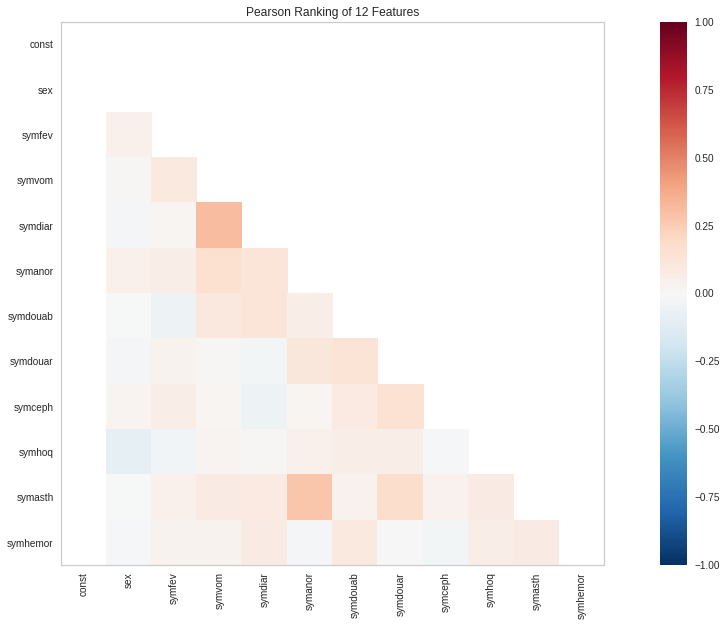

In [373]:
# We removed many features, the matrix before that, that high correlations
Corr_vision(X_try)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

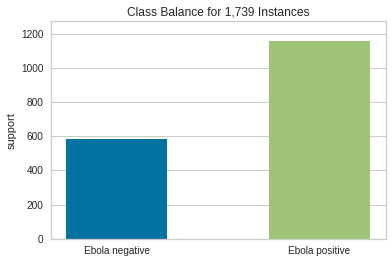

In [374]:
# Imbalance of the data 
Imbalance(y_try)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/lavinia/anaconda3/lib/python3.8/site-packages/yellowbrick/features/radviz.py:134: RuntimeWarning: invalid value encountered in true_divide
  return (X - a[np.newaxis, :]) / ((b - a)[np.newaxis, :])


KeyError: 0

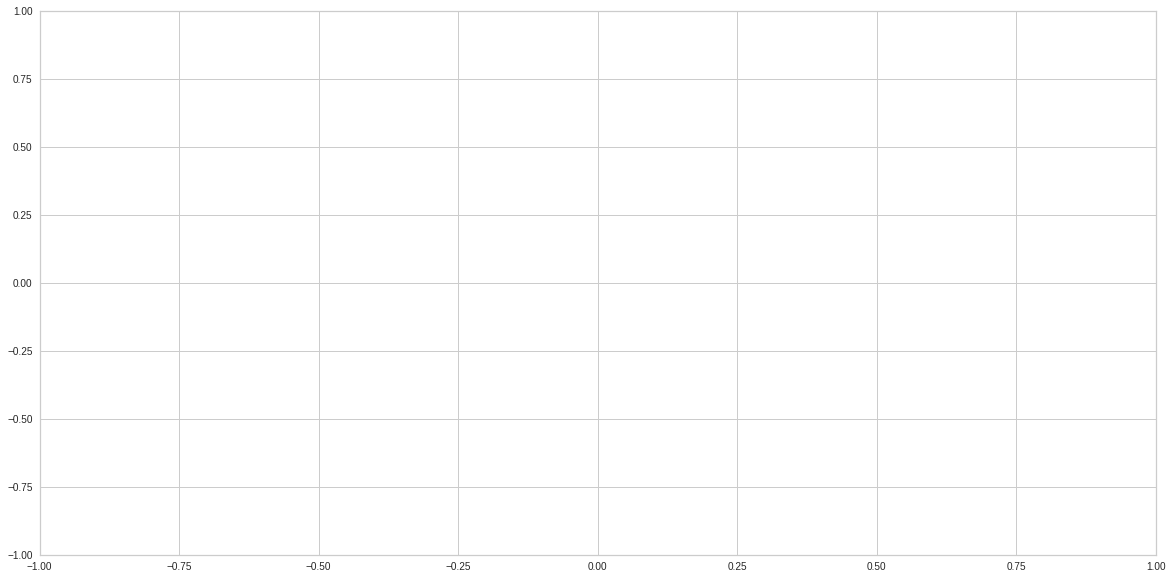

In [375]:
# Radial vision Not sure why not working :(  )
# Have a look at Ridha's (his works)

"""
- might bee becaue of int vs string ? ...
"""


Rad_vision(X_try,y_try)


## Elbow to find the K's for clusters

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

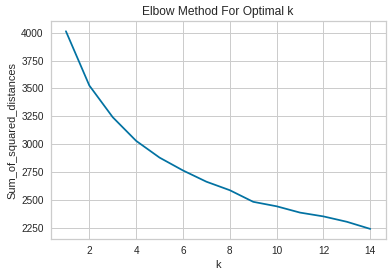

In [376]:

# No interesting deduction from this plot 
elbow_plot(X_try)

## PCA

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

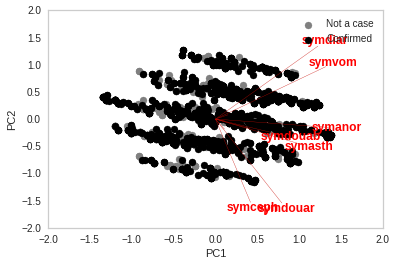

In [377]:
k = 2; # Determined from the graph above (kind off), not really, we just hope to have two clusters
y_s = y_try.astype('str')

PCA_(k, X_try, y_s)

## PCA 3D

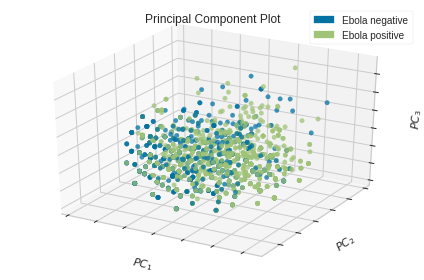

In [383]:
PCA_vision_3D(X_try,y_try)

## Decision_trees

Accuracy:  0.6992337164750958
Macro F1 score:  0.5715025175285868
Micro F1 score:  0.6992337164750958


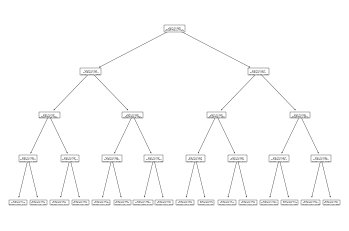

In [384]:

max_depth = 4
Decision_trees(X_try,y_try,max_depth, split = 0.3)

## Random Forest

In [385]:
index_tree = 2 # Which tree to plot [from 0 to n_est -1 I think]
n_est = 10; # Number trees 
sample_split = 2
Random_forest(X_try,y_try,n_est,index_tree, max_depth,sample_split, split = 0.3)

DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1228959102)
Accuracy:  0.6915708812260536
Macro F1 score:  0.5184253502564249
Micro F1 score:  0.6915708812260536


## SVM

In [341]:

SVM_(X_try,y_try, param_grid = {'C': [0.1,1], 'gamma': [1,0.1],'kernel': ['sigmoid', 'poly']})

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVC(C=0.1, gamma=1, kernel='sigmoid')
Accuracy:  0.6915708812260536
Macro F1 score:  0.40883352208380525
Micro F1 score:  0.6915708812260536


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.7s finished


## Feature importance

Feature importance with logistic reg / linear reg

Feature importance according to Lasso 

Feature importance with Least square, 

In [342]:
# Feature importance with logistic reg / linear reg
# Log_reg(X,y) DOES NOT CONVERGE AT ALL, but we need to modify the model that's why, now we have -1,0,1

Best alpha using built-in LassoCV: 0.000319
Best score using built-in LassoCV: 0.095364
Lasso picked 11 variables and eliminated the other 1 variables


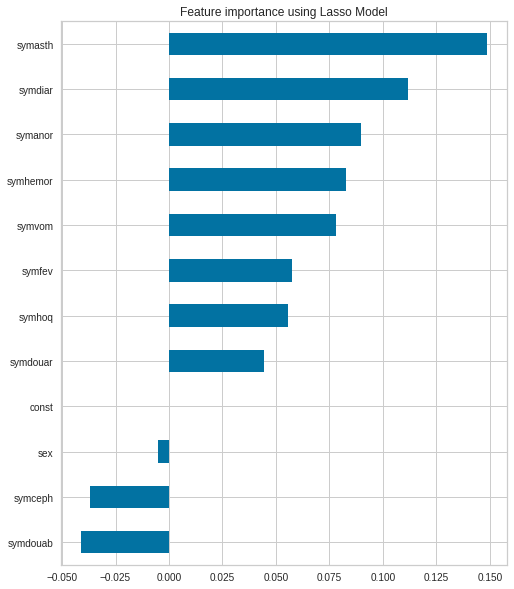

In [343]:
# Feature importance according to Lasso 
Lasso(X_try,y_try)


In [344]:
# Backward elimination, "least-sqaures" or "logistic regression"


# No clue why not working ....
backward_elimation(X_try, y_try, "least-squares")

ValueError: Length of passed values is 11, index implies 12.

# Next time, for clinic data 

In [51]:
# Removed rows with dots (not many) as can't be replaced by yes no

df_clinic = df_clinic[df_clinic['pouls'] != '.']
df_clinic = df_clinic[df_clinic['bp'] != '.']
df_clinic = df_clinic[df_clinic['rrate'] != '.']

In [52]:
df_clinic['pouls'] = df_clinic['pouls'].astype('int')
df_clinic['bp'] = df_clinic['bp'].astype('int')
df_clinic['rrate'] = df_clinic['rrate'].astype('int')


In [53]:
# Adding the lan
df_lab_results = df_clinic[['fevtemp', 'pouls', 'bp', 'rrate', 'msfid']] 

df_lab_results = df_lab_results.groupby(by = 'msfid').mean()

In [54]:
df_lab_yes_symp = df_yes_symp_patient.merge(df_lab_results, on = 'msfid', how = 'inner')

In [55]:
df_lab_yes_symp

,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,swallow,...,hematem,stool,hemat,vagbl,injbl,petc,fevtemp,pouls,bp,rrate
msfid,,,,,,,,,,,,,,,,,,,,,
G100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,53.460000,999.000000,999.000000,999.000000
G1000,0,2,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,78.966667,999.000000,999.000000,999.000000
G1001,1,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,86.520000,999.000000,999.000000,999.000000
G1002,2,5,0,0,5,0,0,2,0,0,...,0,0,0,0,0,0,80.167347,999.000000,999.000000,999.000000
G1004,0,2,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,38.166667,999.000000,686.000000,999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U4,6,7,2,0,6,0,0,0,0,0,...,0,0,0,0,0,0,54.234783,479.492754,493.507246,533.043478
U5,1,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,55.500000,999.000000,999.000000,999.000000
U6,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,46.553846,999.000000,931.384615,999.000000


In [56]:
# Ebola patients

print(df_linelist['epistat'].value_counts())
print(df_linelist['age'].value_counts())

# 
df_linelist['sex'].value_counts()

1    1507
0     978
Name: epistat, dtype: int64
30.0    149
25.0    119
35.0    118
40.0    114
60.0     93
       ... 
2.5       1
1.7       1
0.4       1
73.0      1
2.7       1
Name: age, Length: 104, dtype: int64


1    1293
2    1121
9      71
Name: sex, dtype: int64

In [57]:
df_status = df_linelist[['epistat','age', 'sex','msfid']]

df_status

,epistat,age,sex,msfid
0,1,60.0,2,G1
1,1,35.0,2,G10
2,1,40.0,1,G100
3,1,40.0,1,G1000
4,1,8.0,2,G1001
...,...,...,...,...
2495,1,999.0,2,G995
2496,1,43.0,1,G996
2497,0,34.0,2,G997
2498,1,6.0,1,G998


In [434]:
df_ml_sum_symp = df_lab_yes_symp.merge(df_status, how = 'inner', on = 'msfid')

df_ml_sum_symp

,msfid,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,...,vagbl,injbl,petc,fevtemp,pouls,bp,rrate,epistat,age,sex
0,G100,0,0,0,0,0,0,0,0,0,...,0,0,0,53.460000,999.0,999.000000,999.0,1,40.0,1
1,G1000,0,2,1,1,0,0,0,1,0,...,0,0,0,78.966667,999.0,999.000000,999.0,1,40.0,1
2,G1001,1,1,2,0,1,0,0,0,0,...,0,0,0,86.520000,999.0,999.000000,999.0,1,8.0,2
3,G1002,2,5,0,0,5,0,0,2,0,...,0,0,0,80.167347,999.0,999.000000,999.0,1,12.0,2
4,G1004,0,2,1,0,3,0,0,0,0,...,0,0,0,38.166667,999.0,686.000000,999.0,1,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,G993,4,20,5,1,9,0,0,0,0,...,0,0,0,37.135484,999.0,763.451613,999.0,1,45.0,1
771,G994,2,11,0,0,2,0,0,0,0,...,1,0,0,38.021429,999.0,675.071429,999.0,1,26.0,1
772,G996,1,1,1,1,1,0,0,0,0,...,0,0,0,62.120000,999.0,999.000000,999.0,1,43.0,1
773,G998,0,9,3,0,7,0,0,0,0,...,0,0,0,43.965000,999.0,999.000000,999.0,1,6.0,1


## Cleaning the data for 2nd model (simple, no time variance)

## Cleaning the data for 3rd model; model as a function of time (ask Ridha and read)

In [95]:
# Handling of othrhe and othrsym

# df_symp['othrhe'].value_counts() THIS WAS NOT ADDED TO SYMPTOMS

df_clinic['othrhe'].value_counts() # This column does not make sense........


.                                          8911
ABSENT                                     2360
na                                          919
SAIGNEMENT DU GENOU GAUCHE                    4
HEMORRAGIE CEREBRO-MENINGEE                   3
perte de vue et d'ouie (blind and deaf)       3
rectorrhagie                                  2
HEMOROIDES                                    2
HEMORRAGIE                                    1
Escarres fessiers                             1
PLAIE AU GENOU                                1
oral candiasis                                1
hemorragie digestive haute et basse           1
RECTORRAGIE                                   1
Fébrile                                       1
DIARRHEE SANGLANTE                            1
HEMORRAGIE BUCCALE                            1
SAIGNEMENTS                                   1
yes (not mentioned)                           1
HEMOROIDES NON THROMBOSES                     1
SYNDROME HEMORRAGIQUE                   

In [40]:
print(df_clinic['othrsym'].value_counts().values)
df_clinic['othrsym'].value_counts()


[8594 2265  943   42   20   13    9    9    8    7    7    6    5    5
    5    4    4    4    4    4    4    4    4    4    4    4    3    3
    3    3    3    3    3    3    3    3    3    3    3    3    3    3
    3    3    2    2    2    2    2    2    2    2    2    2    2    2
    2    2    2    2    2    2    2    2    2    2    2    2    2    2
    2    2    2    2    2    2    2    2    2    2    2    2    2    2
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1 

.                                                          8594
ABSENT                                                     2265
na                                                          943
CANDIDOSE BUCCALE                                            42
CANDIDOSE ORALE                                              20
                                                           ... 
jus                                                           1
PALEUR CONJONCTIVALE                                          1
REGARD FIXE + OMNIBULEE + REFRODISSEMENT DES EXTREMITES       1
PALEUR DES TEGUMENTS ET CONJONCTIFS                           1
PROPOS INCOHERENTS                                            1
Name: othrsym, Length: 241, dtype: int64

#### The people go to enlist themselves, aka (LineListing) and then are "followed at the clinic"

We thus have one date for Linelisting and multiple for clinic. We need to make sure that the clinic date is after the listing date

How do we merge the people with a same date, so that we have the symptoms in one day (as they vary in time)

datgck for linelist (date of registration) 
datclin for clinic (date of registration)

df_clinic['']

grouby

groupby identifier, then apply min
join